## KerasのRecurrentレイヤー

Kerasには複数のRecurrentレイヤーや、それに関連したクラスが用意されています。今回のSprintではこれら全てを動かした上で、それぞれの役割を説明できる状態を目指します。

以下のドキュメントにまとめられています。

[Recurrentレイヤー - Keras Documentation](https://keras.io/ja/layers/recurrent/)

### 【問題1】各種手法の実行
Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。

- SimpleRNN
- GRU
- LSTM
- ConvLSTM2D

これらを実行してください。この中でSimpleRNN、GRU、LSTMは同様のタスクに用いることができるため、精度の比較も行なってください。

Keras公式のサンプルコードを利用してください。

LSTMのサンプルコード

[keras/imdb_lstm.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py)

ConvLSTM2Dのサンプルコード

[keras/conv_lstm.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/conv_lstm.py)

このサンプルコードをそのまま使う必要はなく、ノード数やエポックなどは変更して構いません。全て実行する上での実行時間を考慮した数に設定してください。

In [1]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, SimpleRNN, GRU, ConvLSTM2D
from tensorflow.keras.datasets import imdb

In [2]:
max_features = 30000
# cut texts after this number of words (among top max_features most common words)
maxlen = 300
batch_size = 64

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen, truncating='post')
x_test = sequence.pad_sequences(x_test, maxlen=maxlen, truncating='post')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 300)
x_test shape: (25000, 300)


#### SimpleRNN

In [3]:
x = Input(shape=(None,), name='input')
embedding = Embedding(input_dim=max_features,
                      output_dim=400,
                      name='embedding'
                     )(x)
rnn = SimpleRNN(maxlen, name='SimpleRNN')(embedding)
y = Dense(1, activation='sigmoid')(rnn)

model = Model(inputs=x, outputs=y)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Epoch 1/15
391/391 [==============================] - 149s 373ms/step - loss: 0.6982 - accuracy: 0.5244 - val_loss: 0.6731 - val_accuracy: 0.5703
Epoch 2/15
391/391 [==============================] - 145s 371ms/step - loss: 0.6433 - accuracy: 0.6405 - val_loss: 0.6440 - val_accuracy: 0.6275
Epoch 3/15
391/391 [==============================] - 145s 372ms/step - loss: 0.5019 - accuracy: 0.7552 - val_loss: 0.6092 - val_accuracy: 0.6905
Epoch 4/15
391/391 [==============================] - 145s 371ms/step - loss: 0.3836 - accuracy: 0.8343 - val_loss: 0.5819 - val_accuracy: 0.7178
Epoch 5/15
391/391 [==============================] - 144s 369ms/step - loss: 0.2937 - accuracy: 0.8856 - val_loss: 0.6781 - val_accuracy: 0.7675
Epoch 6/15
391/391 [==============================] - 147s 376ms/step - loss: 0.2732 - accuracy: 0.8978 - val_loss: 0.6883 - val_accuracy: 0.7304
Epoch 7/15
391/391 [==============================] - 145s 371ms/step - loss: 0.1846 - accuracy: 0.9361 - val_loss: 0.6663 -

#### GRU

In [4]:
x = Input(shape=(None,), name='input')
embedding = Embedding(input_dim=max_features,
                      output_dim=400,
                      name='embedding'
                     )(x)
rnn = GRU(maxlen, name='GRU')(embedding)
y = Dense(1, activation='sigmoid')(rnn)

model = Model(inputs=x, outputs=y)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Epoch 1/15
391/391 [==============================] - 107s 199ms/step - loss: 0.5635 - accuracy: 0.6894 - val_loss: 0.3483 - val_accuracy: 0.8561
Epoch 2/15
391/391 [==============================] - 77s 196ms/step - loss: 0.2293 - accuracy: 0.9134 - val_loss: 0.3242 - val_accuracy: 0.8633
Epoch 3/15
391/391 [==============================] - 76s 196ms/step - loss: 0.0943 - accuracy: 0.9692 - val_loss: 0.3986 - val_accuracy: 0.8605
Epoch 4/15
391/391 [==============================] - 77s 197ms/step - loss: 0.0325 - accuracy: 0.9898 - val_loss: 0.5665 - val_accuracy: 0.8507
Epoch 5/15
391/391 [==============================] - 76s 195ms/step - loss: 0.0139 - accuracy: 0.9956 - val_loss: 0.5496 - val_accuracy: 0.8363
Epoch 6/15
391/391 [==============================] - 76s 195ms/step - loss: 0.0208 - accuracy: 0.9935 - val_loss: 0.7256 - val_accuracy: 0.8373
Epoch 7/15
391/391 [==============================] - 76s 195ms/step - loss: 0.0111 - accuracy: 0.9958 - val_loss: 0.7570 - val_a

#### LSTM

In [5]:
x = Input(shape=(None,), name='input')
embedding = Embedding(input_dim=max_features,
                      output_dim=400,
                      name='embedding'
                     )(x)
rnn = LSTM(maxlen, name='LSTM')(embedding)
y = Dense(1, activation='sigmoid')(rnn)

model = Model(inputs=x, outputs=y)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Epoch 1/15
391/391 [==============================] - 82s 208ms/step - loss: 0.6074 - accuracy: 0.6642 - val_loss: 0.4532 - val_accuracy: 0.8177
Epoch 2/15
391/391 [==============================] - 77s 198ms/step - loss: 0.3503 - accuracy: 0.8507 - val_loss: 0.4147 - val_accuracy: 0.8278
Epoch 3/15
391/391 [==============================] - 78s 201ms/step - loss: 0.2383 - accuracy: 0.9113 - val_loss: 0.4853 - val_accuracy: 0.8352
Epoch 4/15
391/391 [==============================] - 79s 202ms/step - loss: 0.1480 - accuracy: 0.9470 - val_loss: 0.4935 - val_accuracy: 0.8462
Epoch 5/15
391/391 [==============================] - 78s 200ms/step - loss: 0.0613 - accuracy: 0.9801 - val_loss: 0.6004 - val_accuracy: 0.8302
Epoch 6/15
391/391 [==============================] - 78s 199ms/step - loss: 0.0444 - accuracy: 0.9860 - val_loss: 0.7072 - val_accuracy: 0.8394
Epoch 7/15
391/391 [==============================] - 79s 201ms/step - loss: 0.0240 - accuracy: 0.9930 - val_loss: 0.7808 - val_ac

#### サンプルコードをそのまま実行

In [6]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Epoch 1/15
782/782 [==============================] - 236s 298ms/step - loss: 0.5376 - accuracy: 0.7137 - val_loss: 0.3913 - val_accuracy: 0.8277
Epoch 2/15
782/782 [==============================] - 234s 299ms/step - loss: 0.2530 - accuracy: 0.8999 - val_loss: 0.3730 - val_accuracy: 0.8382
Epoch 3/15
782/782 [==============================] - 234s 299ms/step - loss: 0.1586 - accuracy: 0.9437 - val_loss: 0.4307 - val_accuracy: 0.8295
Epoch 4/15
782/782 [==============================] - 233s 298ms/step - loss: 0.1007 - accuracy: 0.9648 - val_loss: 0.5770 - val_accuracy: 0.8233
Epoch 5/15
782/782 [==============================] - 233s 299ms/step - loss: 0.0652 - accuracy: 0.9790 - val_loss: 0.7285 - val_accuracy: 0.8168
Epoch 6/15
782/782 [==============================] - 233s 298ms/step - loss: 0.0516 - accuracy: 0.9821 - val_loss: 0.7

#### ConvLSTM2D

Epoch 1/30
95/95 [==============================] - 51s 477ms/step - loss: 0.8106 - val_loss: 0.6948
Epoch 2/30
95/95 [==============================] - 45s 474ms/step - loss: 0.7562 - val_loss: 0.7107
Epoch 3/30
95/95 [==============================] - 46s 479ms/step - loss: 0.7205 - val_loss: 0.7342
Epoch 4/30
95/95 [==============================] - 46s 483ms/step - loss: 0.6878 - val_loss: 0.7313
Epoch 5/30
95/95 [==============================] - 46s 485ms/step - loss: 0.6589 - val_loss: 0.7006
Epoch 6/30
95/95 [==============================] - 46s 486ms/step - loss: 0.6325 - val_loss: 0.6638
Epoch 7/30
95/95 [==============================] - 46s 487ms/step - loss: 0.6103 - val_loss: 0.6207
Epoch 8/30
95/95 [==============================] - 46s 487ms/step - loss: 0.5915 - val_loss: 0.5813
Epoch 9/30
95/95 [==============================] - 46s 488ms/step - loss: 0.5748 - val_loss: 0.5548
Epoch 10/30
95/95 [==============================] - 46s 488ms/step - loss: 0.5582 - val_lo

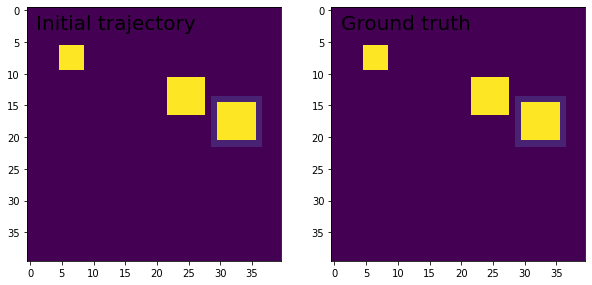

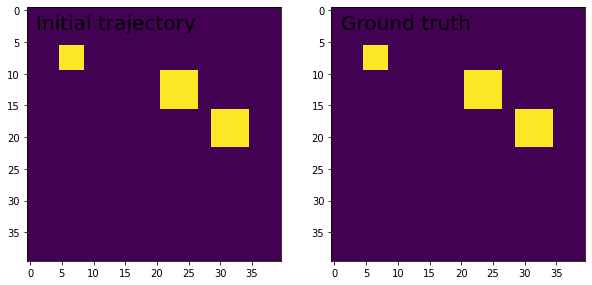

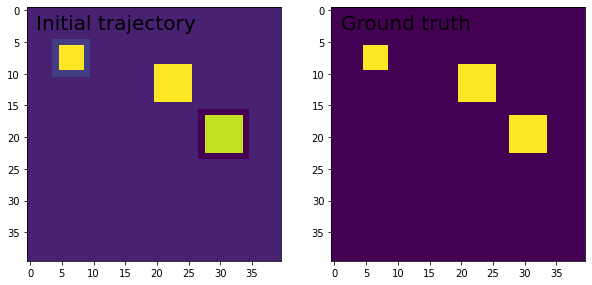

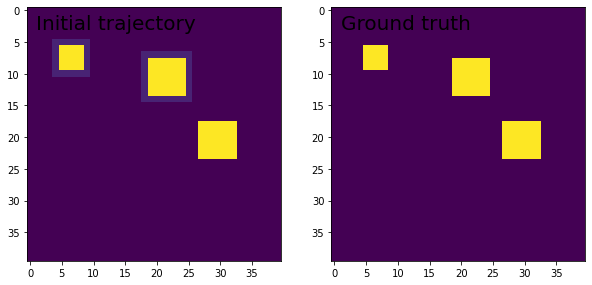

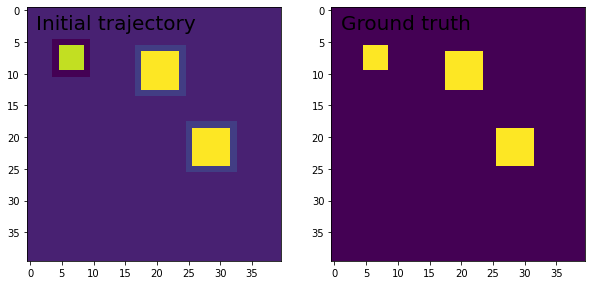

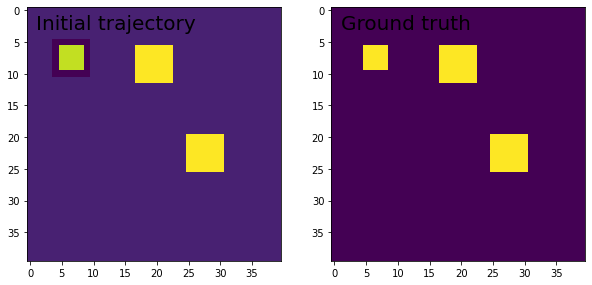

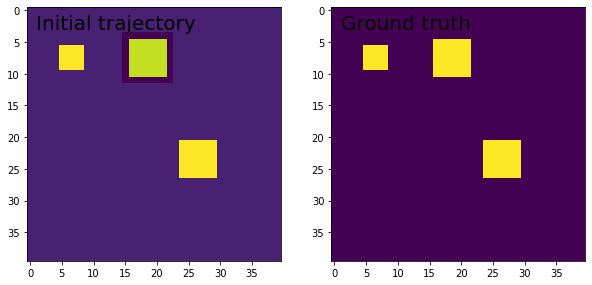

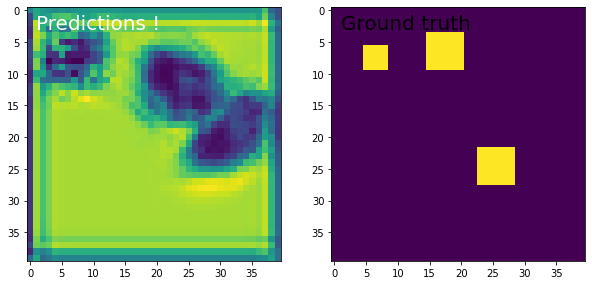

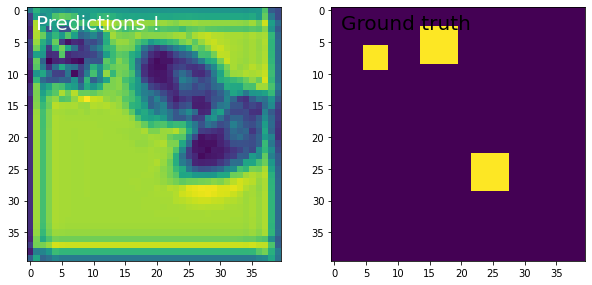

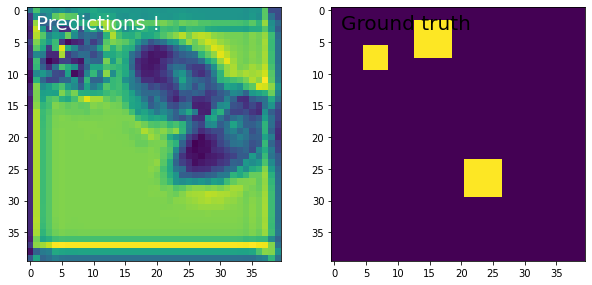

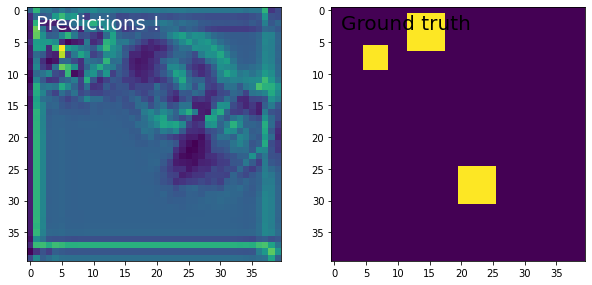

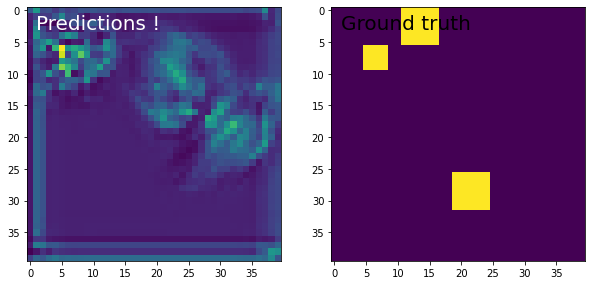

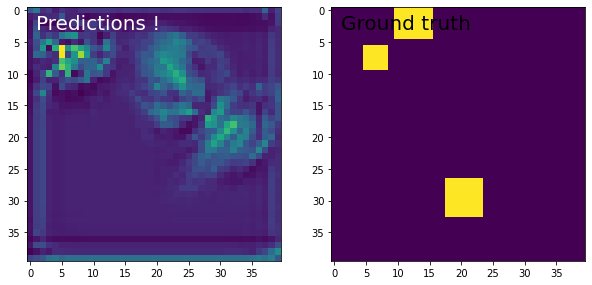

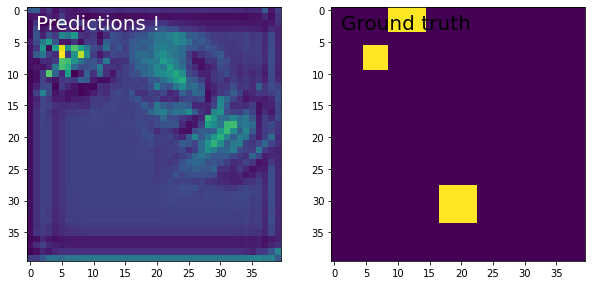

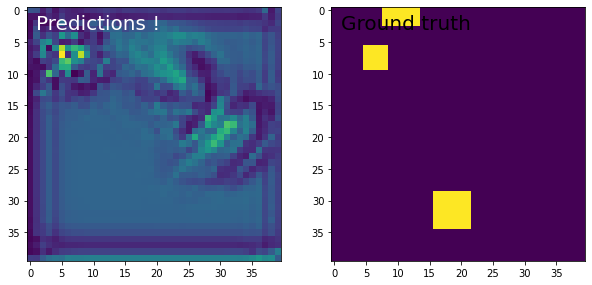

In [7]:
"""
#This script demonstrates the use of a convolutional LSTM network.
This network is used to predict the next frame of an artificially
generated movie which contains moving squares.
"""
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=30, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

### 【問題3】他のクラスの説明
ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。

- RNN
- SimpleRNNCell
- GRUCell
- LSTMCell
- StackedRNNCells
- CuDNNGRU
- CuDNNLSTM

#### RNN
引数にRNNレイヤセルのインスタンスを渡すことでRNNモデルを構築できるクラス。

#### SimpleRNNCell
RNNを時系列方向に構築しているセルの1単位。RNNに渡すことでSimpleRNNを構築できる。

#### GRUCell
GRUを時系列方向に構築しているセルの1単位。RNNに渡すことでGRUを構築できる。

#### LSTMCell
LSTMを時系列方向に構築しているセルの1単位。RNNに渡すことでLSTMを構築できる。

#### StackedRNNCells
RNNインスタンスのリストを渡すことでRNNの階層を増やすことができる。
最終的に、返り値をRNNで渡すことでモデルを構築する。

#### CuDNNGRU
NVIDIACUDA®ディープニューラルネットワークライブラリ（cuDNN）を使用して交差校に動作するGRUレイヤ。

#### CuDNNLSTM
NVIDIACUDA®ディープニューラルネットワークライブラリ（cuDNN）を使用して交差校に動作するLSTMレイヤ。